In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# cv2.__version__ == '4.1.0' https://docs.opencv.org/4.1.0/

In [68]:
from glob import iglob
from os.path import basename, splitext, join

In [42]:
# load image examples into an array of tuples: (img: np.ndarray, img_name: str)
examples = []
for img_fname in iglob("i/*.png"):
    img_name = splitext(basename(img_fname))[0]
    img = cv2.imread(img_fname, cv2.IMREAD_GRAYSCALE)
    examples.append((img, img_name))

In [82]:
# shows a grayscale image without changing it's pixel values for display
# the image is saved as a .png if save_fname is not empty
def show_grayscale(img, img_title="", save_fname="", save_path="o"):
    plt.axis('off')
    plt.title(img_title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    if save_fname:
        cv2.imwrite(join(save_path, save_fname + ".png"), img)

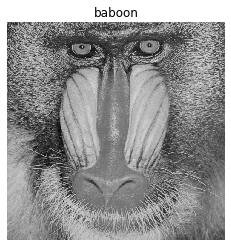

In [83]:
test_img = examples[0] # baboon
show_grayscale(*test_img)

## 1.1 Transformação de Intensidade

## $(i)$ Negativo da imagem

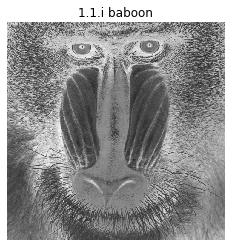

In [84]:
img = 255 - test_img[0] # [0, 255] -> [255, 0]
title = f"1.1.i {test_img[1]}"
show_grayscale(img, title, save_fname=title)

## $(ii)$ Converter o intervalo de intensidades para $[100, 200]$

min = 0, max = 230
min = 100.0, max = 190.19607843137254


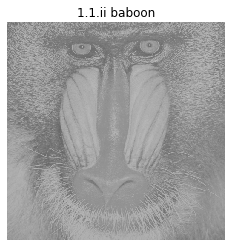

In [88]:
img = 100 * (test_img[0] / 255.0) + 100 # [0, 255] -> [100, 200]

title = f"1.1.ii {test_img[1]}"
show_grayscale(img, title, save_fname=title)

print(f"min = {np.min(test_img[0])}, max = {np.max(test_img[0])}")
print(f"min = {np.min(img)}, max = {np.max(img)}")

## 1.2 Ajuste de Brilho

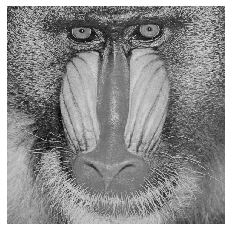

In [101]:
def gamma_correct(normalized_img, gamma):
    return normalized_img.copy() ** (1 / gamma)

normalized_img = (test_img[0] / 255.0) # [0, 255] -> [0, 1]
gamma = 1.0
show_grayscale(255.0 * gamma_correct(normalized_img, gamma)) # original image (γ = 1.0)

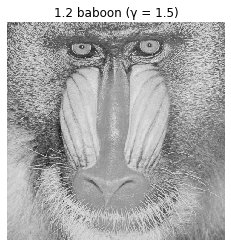

In [89]:
gamma = 1.5
title = f"1.2 {test_img[1]} (γ = {gamma})"
show_grayscale(255.0 * gamma_correct(normalized_img, gamma), title, save_fname=title)

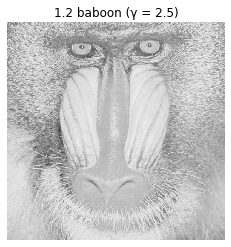

In [90]:
gamma = 2.5
title = f"1.2 {test_img[1]} (γ = {gamma})"
show_grayscale(255.0 * gamma_correct(normalized_img, gamma), title, save_fname=title)

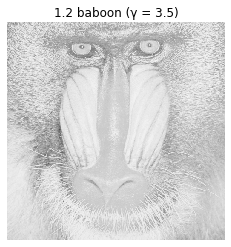

In [91]:
gamma = 3.5
title = f"1.2 {test_img[1]} (γ = {gamma})"
show_grayscale(255.0 * gamma_correct(normalized_img, gamma), title, save_fname=title)

## 1.3 Planos de Bits

Os níveis de cinza de uma imagem monocromática com $m$ bits podem ser representados na forma de um polinomio de base 2: 
$a_{m−1} 2^{m−1} + a_{m−2} 2^{m−2} + . . . + a_{1} 2^{1} + a_{0} 2^{0}$


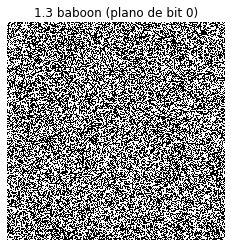

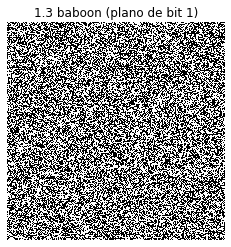

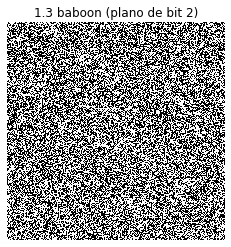

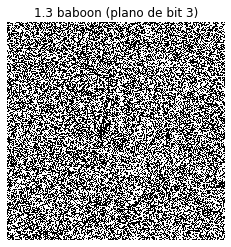

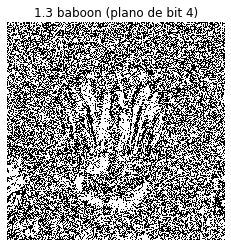

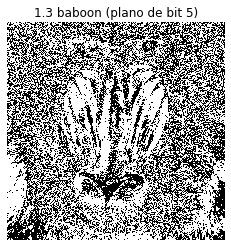

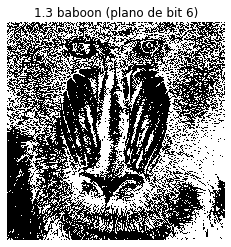

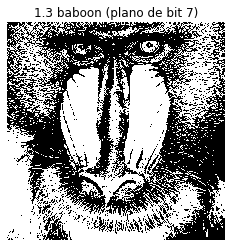

In [119]:
for plane in range(0, 8):
    img = (test_img[0] >> plane) & 1
    title = f"1.3 {test_img[1]} (plano de bit {plane})"
    show_grayscale(np.where(img, 255, 0), title, save_fname=title)
    plt.show()

## 1.4 Mosaico

## 1.5 Combinação de Imagens

In [120]:
def lerp(A, B, t):
    return t * A + (1 - t) * B

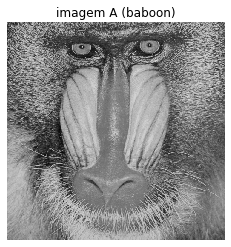

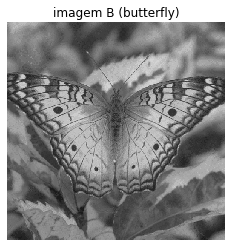

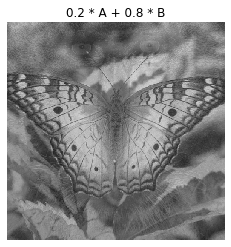

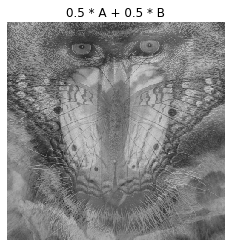

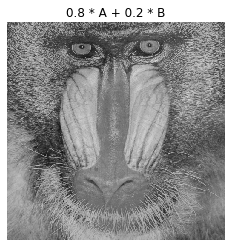

In [129]:
test_img_2 = examples[1] # butterfly

show_grayscale(test_img[0], f"imagem A ({test_img[1]})")
plt.show()
show_grayscale(test_img_2[0], f"imagem B ({test_img_2[1]})")
plt.show()

for t in [0.2, 0.5, 0.8]:
    show_grayscale(lerp(test_img[0], test_img_2[0], t), 
                   f"{t:.1f} * A + {1-t:.1f} * B", 
                   save_fname=f"1.5 {test_img[1]} & {test_img_2[1]} (t = {})")
    plt.show()